# Linear Regression


In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [19]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

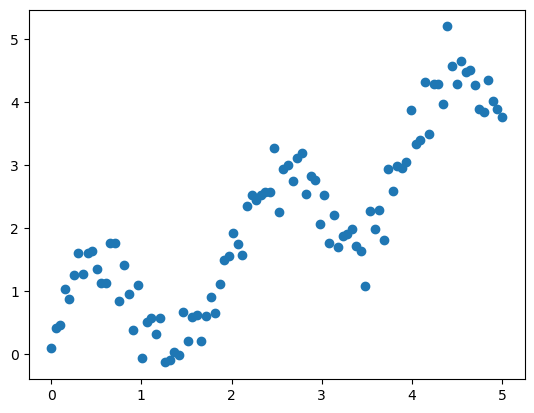

In [20]:
plt.scatter(x,y)

#### nonlinear

In [21]:
regr_lin = LinearRegression()

In [22]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [23]:
regr_lin.fit(X,y)

LinearRegression()

0.5492101752699007


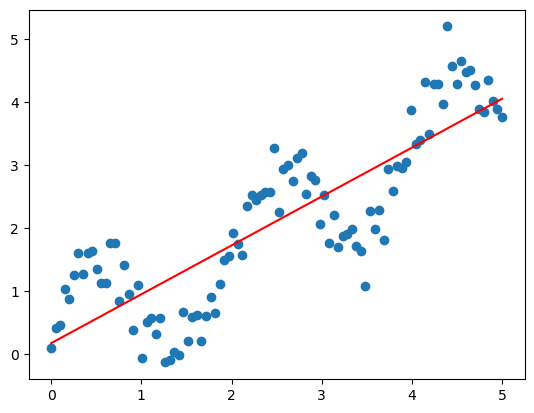

In [24]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [25]:
print(x.shape)

(100,)


In [26]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [27]:
regr_poly = LinearRegression()

In [28]:
regr_poly.fit(X_poly, y)

LinearRegression()

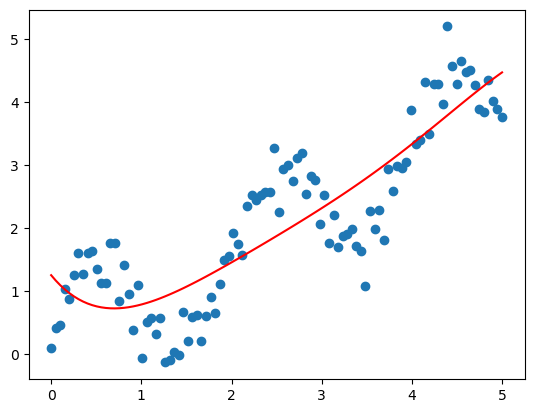

In [29]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [30]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.75227134  1.82844053 -0.64691556  0.11312339 -0.00754289]
interception:  1.2525693315142346


In [31]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #轉至矩陣(為了可以相乘

array([1.25256933, 1.16865209, 1.09357286, 1.02685774, 0.96804987,
       0.9167092 , 0.87241213, 0.83475122, 0.80333495, 0.77778736,
       0.75774778, 0.74287052, 0.73282459, 0.72729339, 0.72597441,
       0.72857895, 0.73483179, 0.74447094, 0.75724729, 0.77292436,
       0.79127796, 0.81209593, 0.83517782, 0.86033459, 0.88738834,
       0.91617197, 0.94652893, 0.97831288, 1.01138743, 1.04562579,
       1.08091055, 1.1171333 , 1.1541944 , 1.19200264, 1.23047497,
       1.26953616, 1.30911856, 1.34916176, 1.38961232, 1.43042345,
       1.47155471, 1.51297176, 1.55464598, 1.59655427, 1.63867866,
       1.68100607, 1.72352801, 1.76624025, 1.80914256, 1.85223838,
       1.89553454, 1.93904098, 1.9827704 , 2.02673803, 2.07096126,
       2.11545942, 2.16025341, 2.20536546, 2.25081879, 2.29663734,
       2.34284547, 2.38946763, 2.43652813, 2.48405075, 2.53205855,
       2.58057346, 2.62961608, 2.67920532, 2.72935814, 2.78008922,
       2.83141068, 2.8833318 , 2.93585868, 2.98899398, 3.04273

In [32]:
regr_poly.predict(X_poly)

array([1.25256933, 1.16865209, 1.09357286, 1.02685774, 0.96804987,
       0.9167092 , 0.87241213, 0.83475122, 0.80333495, 0.77778736,
       0.75774778, 0.74287052, 0.73282459, 0.72729339, 0.72597441,
       0.72857895, 0.73483179, 0.74447094, 0.75724729, 0.77292436,
       0.79127796, 0.81209593, 0.83517782, 0.86033459, 0.88738834,
       0.91617197, 0.94652893, 0.97831288, 1.01138743, 1.04562579,
       1.08091055, 1.1171333 , 1.1541944 , 1.19200264, 1.23047497,
       1.26953616, 1.30911856, 1.34916176, 1.38961232, 1.43042345,
       1.47155471, 1.51297176, 1.55464598, 1.59655427, 1.63867866,
       1.68100607, 1.72352801, 1.76624025, 1.80914256, 1.85223838,
       1.89553454, 1.93904098, 1.9827704 , 2.02673803, 2.07096126,
       2.11545942, 2.16025341, 2.20536546, 2.25081879, 2.29663734,
       2.34284547, 2.38946763, 2.43652813, 2.48405075, 2.53205855,
       2.58057346, 2.62961608, 2.67920532, 2.72935814, 2.78008922,
       2.83141068, 2.8833318 , 2.93585868, 2.98899398, 3.04273

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [33]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [34]:
sigma = 0.3

In [35]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [36]:
regr_rbf = LinearRegression()

In [37]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

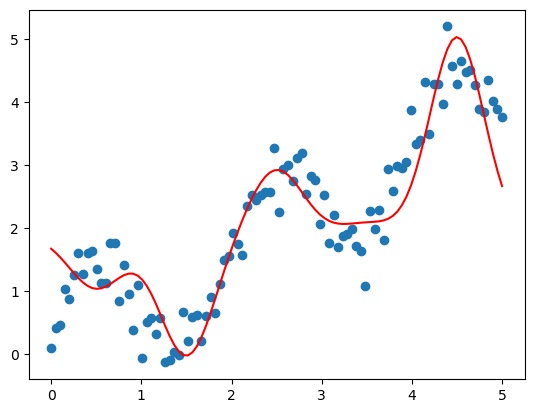

In [38]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [39]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.83675456 -1.90504955  1.04824697  0.19514566  3.14766634]
interception:  1.8804274837157737


#### Comparison

In [40]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

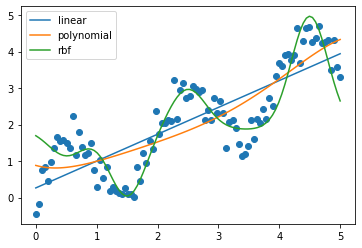

In [27]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [41]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5492101752699007


In [42]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46129841279915235


In [43]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26334217188920767
